In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
df = pd.read_excel("data/Online Retail.xlsx")

print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# 결측치 확인
df.isna().sum() / len(df)
# CustomerID 는 25% 가량이 결측치
# Descript은 0.2% 가량이 관측치

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

# 전처리

In [7]:
# 마이너스 값들 제외
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [8]:
# CustomerID 결측치 제거
df = df[df['CustomerID'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [9]:
# 국가별 카운트 수
df['Country'].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [10]:
# 영국 이외의 데이터 제거
df = df[df['Country'] == 'United Kingdom']
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


# RFM 분석 준비

In [11]:
# Recency(최신성)
# Frequency(빈도)
# Monetary(총금액)

In [12]:
# 구매금액 파생변수 생성
df['sale_amount'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [13]:
# 빈도(Frequency) : 상위 고객 5명
df['CustomerID'].value_counts()

CustomerID
17841.0    7847
14096.0    5111
12748.0    4595
14606.0    2700
15311.0    2379
           ... 
17752.0       1
16742.0       1
13120.0       1
16144.0       1
17956.0       1
Name: count, Length: 3920, dtype: int64

In [14]:
# 고객 별 주문금액 확인(Monetary)
df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)

CustomerID
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
17511.0     91062.38
16029.0     81024.84
             ...    
16878.0        13.30
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
Name: sale_amount, Length: 3920, dtype: float64

In [15]:
# 인보이스별 상품 주문 수량
df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count()

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64

# 고객 별 Recency, Frequency, Monetary 가공

In [16]:
# df 컬럼 별 연산 지정
aggregations = {
    'InvoiceDate': 'max',  # 주문 날짜의 최신  Recency
    'InvoiceNo': 'count',  # 총 주문 건수     Frequency
    'sale_amount':'sum'    # 총 주문 금액     Monetary value
}

cust_df = df.groupby('CustomerID').agg(aggregations)
cust_df

,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346.0,2011-01-18 10:01:00,1,77183.60
12747.0,2011-12-07 14:34:00,103,4196.01
12748.0,2011-12-09 12:20:00,4595,33719.73
12749.0,2011-12-06 09:56:00,199,4090.88
12820.0,2011-12-06 15:12:00,59,942.34
...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60
18281.0,2011-06-12 10:53:00,7,80.82
18282.0,2011-12-02 11:43:00,12,178.05


In [17]:
# 컬럼 이름 변경 to RFM
name_change = {
    'InvoiceDate': 'Recency',
    'InvoiceNo' : 'Frequency',
    'sale_amount' : 'Monetary'
}

cust_df = cust_df.rename(columns = name_change)
cust_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2011-01-18 10:01:00,1,77183.60
12747.0,2011-12-07 14:34:00,103,4196.01
12748.0,2011-12-09 12:20:00,4595,33719.73
12749.0,2011-12-06 09:56:00,199,4090.88
12820.0,2011-12-06 15:12:00,59,942.34
...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60
18281.0,2011-06-12 10:53:00,7,80.82
18282.0,2011-12-02 11:43:00,12,178.05


In [18]:
# RESET INDEX
cust_df = cust_df.reset_index()
cust_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12747.0,2011-12-07 14:34:00,103,4196.01
2,12748.0,2011-12-09 12:20:00,4595,33719.73
3,12749.0,2011-12-06 09:56:00,199,4090.88
4,12820.0,2011-12-06 15:12:00,59,942.34
...,...,...,...,...
3915,18280.0,2011-03-07 09:52:00,10,180.60
3916,18281.0,2011-06-12 10:53:00,7,80.82
3917,18282.0,2011-12-02 11:43:00,12,178.05
3918,18283.0,2011-12-06 12:02:00,756,2094.88


In [19]:
# 데이터 상 최신 날짜
cust_df['Recency'].max()

Timestamp('2011-12-09 12:49:00')

In [20]:
import datetime as dt

# 데이터상 마지막 날로부터 고객이 가장 최근 방문한 날까지 일수 
cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)

In [21]:
cust_df.to_csv("custom_RFM.csv")

# RFM 기반 세그멘테이션

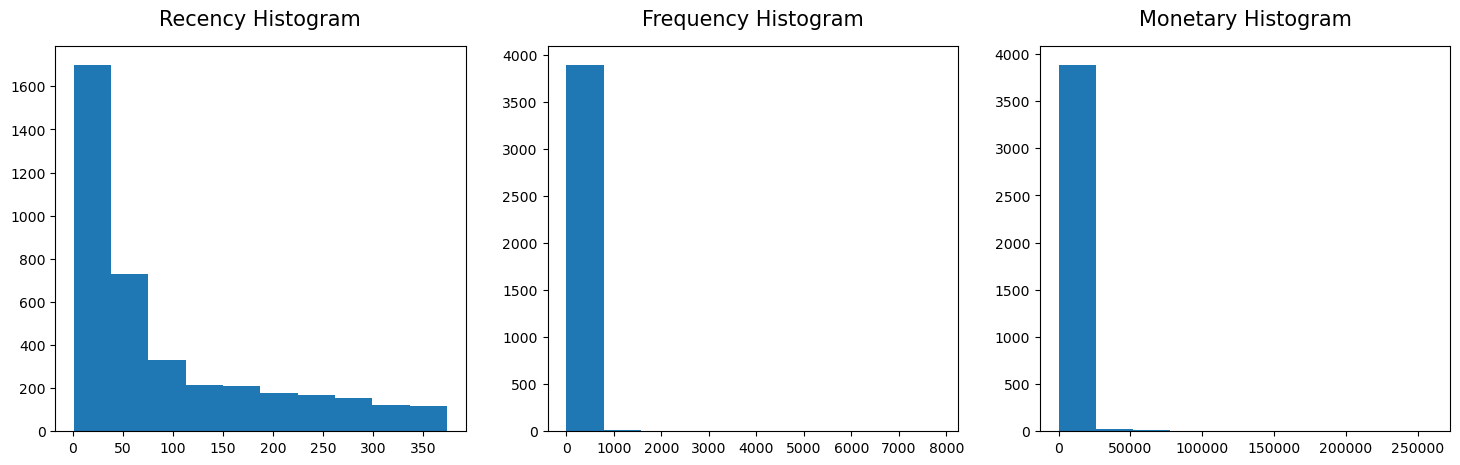

In [22]:
# RFM 한꺼번에 그래프 그리기
plt.figure(figsize=(18, 5))   # 그래프 사이즈 조절

plt.subplot(1, 3, 1)
plt.title("Recency Histogram", fontsize=15, pad=15)
plt.hist(cust_df['Recency'])

plt.subplot(1, 3, 2)
plt.title("Frequency Histogram", fontsize=15, pad=15)
plt.hist(cust_df['Frequency'])

plt.subplot(1, 3, 3)
plt.title("Monetary Histogram", fontsize=15, pad=15)
plt.hist(cust_df['Monetary'])

plt.show()

In [23]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


# kmeans 군집화 - 고객 세그멘테이션

In [24]:
cust_df.to_csv("custom_RFM.csv", index=False)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [26]:
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


In [27]:
import numpy as np

# 로그 변환
# KMeans는 거리 기반 알고리즘
# 큰 값이 지배하면 왜곡됨
# log 변환으로 분포 안정화
cust_log = np.log1p(cust_df[['Recency','Frequency','Monetary']])
cust_log

,Recency,Frequency,Monetary
0,5.789960,0.693147,11.253955
1,1.386294,4.644391,8.342128
2,0.693147,8.432942,10.425868
3,1.609438,5.298317,8.316760
4,1.609438,4.094345,6.849427
...,...,...,...
3915,5.631212,2.397895,5.201806
3916,5.204007,2.079442,4.404522
3917,2.197225,2.564949,5.187665
3918,1.609438,6.629363,7.647729


In [28]:
from sklearn.preprocessing import StandardScaler

# 스케일링
# KMeans는 거리 기반 → 반드시 스케일링 필요
scaler = StandardScaler()
cust_scaled = scaler.fit_transform(cust_log)
cust_scaled

array([[ 1.48161832, -2.40338709,  3.78591383],
       [-1.88997639,  0.73257781,  1.44428   ],
       [-2.42067319,  3.73941895,  3.1199826 ],
       ...,
       [-1.26910093, -0.91780272, -1.09247605],
       [-1.71913018,  2.30798143,  0.88585825],
       [-0.05406709,  0.42962703,  0.78039553]], shape=(3920, 3))

# 최적 k 찾기

In [29]:
from sklearn.metrics import silhouette_score

# ✅ 3) silhouette로 최적 k 찾기
X = cust_scaled

k_range = range(2, 11)  # silhouette는 k=2부터
results = []
best_k, best_score = None, -1

for k in k_range:
    model = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto"
    )
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)

    results.append({"k": k, "silhouette": score})

    if score > best_score:
        best_k, best_score = k, score

results_df = pd.DataFrame(results).sort_values("k").reset_index(drop=True)

print(results_df)
print(f"\n✅ Best k = {best_k}, silhouette = {best_score:.4f}")

    k  silhouette
0   2    0.399869
1   3    0.302760
2   4    0.306834
3   5    0.278735
4   6    0.273657
5   7    0.265201
6   8    0.255262
7   9    0.247912
8  10    0.259015

✅ Best k = 2, silhouette = 0.3999


# 시각화

### Silhouette Plot (군집 품질 시각화)

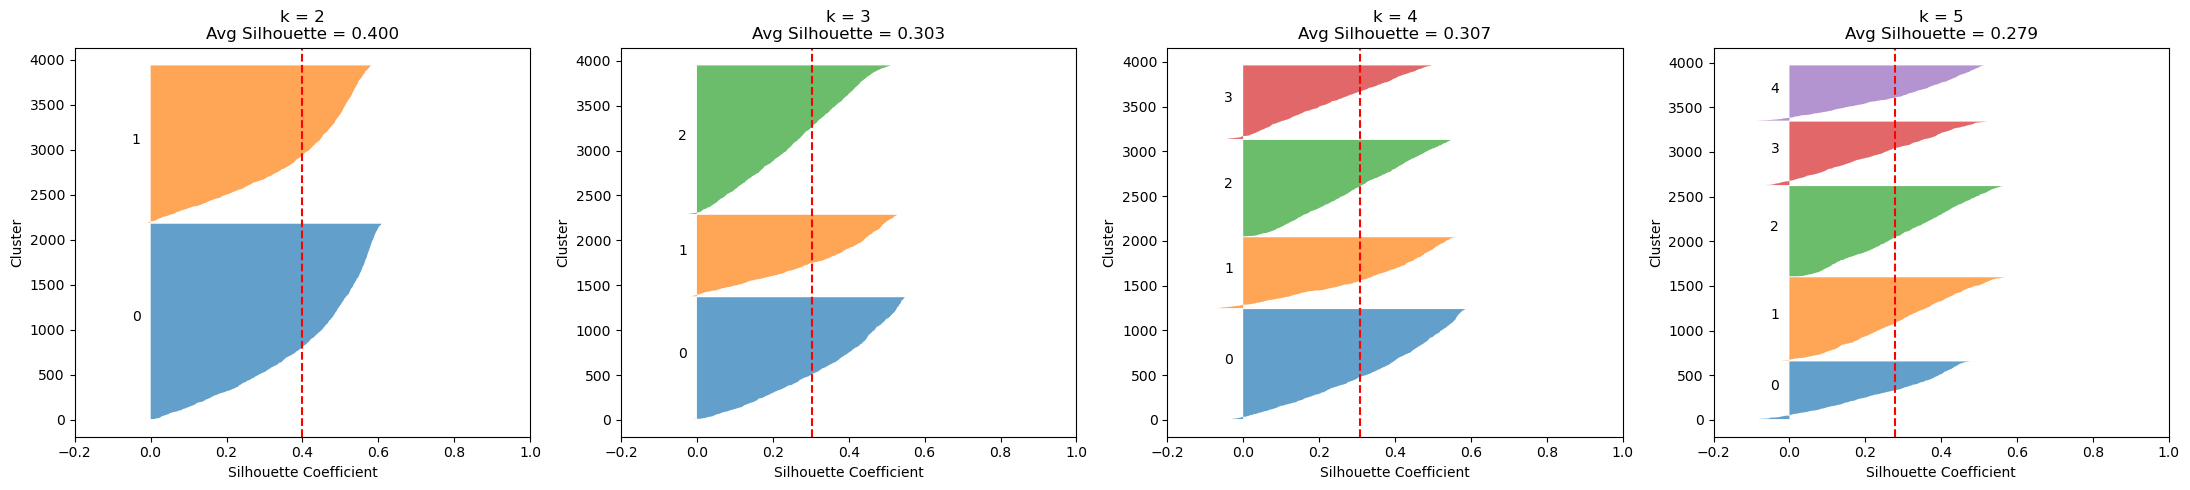

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 비교할 k 값
k_values = [2, 3, 4, 5]

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

for idx, k in enumerate(k_values):
    
    ax = axes[idx]
    
    # KMeans 학습
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    cluster_labels = kmeans.fit_predict(cust_scaled)
    
    # silhouette 계산
    silhouette_avg = silhouette_score(cust_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(cust_scaled, cluster_labels)
    
    y_lower = 10
    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7
        )
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f"k = {k}\nAvg Silhouette = {silhouette_avg:.3f}")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_xlim([-0.2, 1])
    
plt.tight_layout()
plt.show()

In [31]:
# 최적의 k=3으로 가정하고 kmeans 군집화 수행
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(cust_scaled)
cluster_labels

cust_df['cluster'] = cluster_labels
cust_df

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,326,1,77183.60,2
1,12747.0,3,103,4196.01,1
2,12748.0,1,4595,33719.73,1
3,12749.0,4,199,4090.88,1
4,12820.0,4,59,942.34,1
...,...,...,...,...,...
3915,18280.0,278,10,180.60,0
3916,18281.0,181,7,80.82,0
3917,18282.0,8,12,178.05,2
3918,18283.0,4,756,2094.88,1


In [32]:
# 각 고객 군집 별 특징 파악
cluster_summary = cust_df.groupby('cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'cluster':'count'
}).rename(columns={'cluster':'count'})

cluster_summary

,Recency,Frequency,Monetary,count
cluster,,,,
0,177.226068,15.053019,286.589743,1358
1,15.848018,256.321586,5671.699108,908
2,65.590085,61.148126,1069.709730,1654


# 📊 RFM 기반 K=3 고객 세그멘테이션 해석 결과

## 🔎 군집 요약

| Cluster | Recency | Frequency | Monetary | 고객수 |
|----------|----------|------------|------------|--------|
| 0 | 177 | 15 | 286 | 1,358 |
| 1 | 15 | 256 | 5,671 | 908 |
| 2 | 65 | 61 | 1,069 | 1,654 |

> 해석 기준  
> - Recency ↓ (최근 구매) 좋음  
> - Frequency ↑ (구매 빈도) 좋음  
> - Monetary ↑ (구매 금액) 좋음  

---

# 🏆 Cluster 1 — **Ultra VIP (핵심 매출 고객)**

## 📌 특징
- 최근 구매 (Recency 매우 낮음)
- 매우 높은 구매 빈도
- 압도적인 구매 금액
- 전체 고객의 약 23%

👉 비즈니스 핵심 수익원  
👉 매출 기여도 최상위 그룹

## 🚀 마케팅 액션 플랜

### 1️⃣ 이탈 방지 전략
- VIP 전용 등급 운영 (Black/Diamond 등급)
- 전용 고객센터 / 빠른 CS 처리
- 전용 혜택 및 이벤트 초대

### 2️⃣ LTV 극대화 전략
- 정기구독 전환 유도
- 프리미엄 상품 추천
- 한정판/선공개 제품 제공

### 3️⃣ 확장 전략
- 친구 추천 리워드
- 리뷰 작성 보상
- 커뮤니티 리더화

### 🎯 KPI
- VIP 유지율
- 객단가 상승
- 추천 기반 신규 고객 증가

---

# 🌿 Cluster 2 — **Core Growth (성장 핵심 고객군)**

## 📌 특징
- 최근 활동 있음
- 중상위 구매 빈도
- 성장 가능한 구매 금액
- 고객 수 가장 많음 (약 42%)

👉 VIP로 육성해야 할 전략적 핵심 그룹

## 🚀 마케팅 액션 플랜

### 1️⃣ VIP 승급 전략
- 누적 구매 기반 등급제 운영
- “VIP까지 N회 남았습니다” 알림

### 2️⃣ 구매 주기 단축 전략
- 재구매 알림 자동화
- 소모성 상품 추천

### 3️⃣ 객단가 상승 전략
- 세트/번들 상품 제안
- 상위 카테고리 노출 강화

### 🎯 KPI
- VIP 전환율
- 평균 구매금액 증가
- 재구매율 상승

---

# ⚠️ Cluster 0 — **Dormant (휴면/저활성 고객군)**

## 📌 특징
- 오래전 구매 (Recency 매우 높음)
- 낮은 구매 빈도
- 낮은 구매 금액
- 고객 수는 적지 않음

👉 이탈 위험군  
👉 프로모션 중심 관리 대상

## 🚀 마케팅 액션 플랜

### 1️⃣ 복귀 캠페인
- 강력 할인 쿠폰 제공 (30~50%)
- 무료 배송 혜택

### 2️⃣ 긴급성 메시지
- “한정 복귀 혜택”
- “이번 주까지 특별 할인”

### 3️⃣ 이탈 원인 분석
- 설문조사
- 가격 민감도 테스트

### 🎯 KPI
- 복귀율
- 쿠폰 사용률
- 2회 이상 재구매 전환율

---

# 🎯 전략적 요약

| 군집 | 별칭 | 전략 방향 |
|-------|-------|-------------|
| Cluster 1 | Ultra VIP | 유지 & 확장 |
| Cluster 2 | Core Growth | 육성 & 전환 |
| Cluster 0 | Dormant | 복귀 & 정리 |

---

# 🔥 핵심 인사이트

1. 매출 대부분은 Ultra VIP에서 발생할 가능성 높음  
2. Core Growth 고객을 VIP로 전환시키는 것이 성장의 핵심  
3. Dormant 고객은 무분별한 할인보다 ROI 중심 전략 필요  
